# SUPPY CHAIN ANALYTICS BUAN-675-A

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from random import random

In [98]:
buan = pd.read_csv("baun675_hw1_data.csv")  
print(buan)

             x          y  population name
0  -125.054795  13.703696       42760    A
1    41.839656 -59.181868        7950    B
2    20.940089   5.932856       21905    C
3   -88.803093  -3.120039       36835    D
4    59.086009  -5.155562       38640    E
5  -162.169694   8.157550       30760    F
6    60.158522 -91.886845       41455    G
7  -108.072094 -41.994506       50915    H
8    17.724978  32.886515       23235    I
9   -23.892725 -79.493783       33540    J
10  -30.999653  15.342608       53150    K
11  135.996903  23.266191        8040    L
12   51.904766  32.616293       53585    M
13   21.965280  67.237630        9045    N
14  -50.887413 -40.731170       15400    O


In [24]:
buan_pd = pd.DataFrame(buan)
print(buan_pd.columns)

buan_pd.rename(columns = {'x':'Latitude', 'y':'Longitude',}, inplace = True)

Index(['x', 'y', 'population', 'name'], dtype='object')


In [99]:
print(buan_pd.columns)

Index(['Latitude', 'Longitude', 'population', 'name'], dtype='object')


In [100]:
print(buan_pd)

      Latitude  Longitude  population name
0  -125.054795  13.703696       42760    A
1    41.839656 -59.181868        7950    B
2    20.940089   5.932856       21905    C
3   -88.803093  -3.120039       36835    D
4    59.086009  -5.155562       38640    E
5  -162.169694   8.157550       30760    F
6    60.158522 -91.886845       41455    G
7  -108.072094 -41.994506       50915    H
8    17.724978  32.886515       23235    I
9   -23.892725 -79.493783       33540    J
10  -30.999653  15.342608       53150    K
11  135.996903  23.266191        8040    L
12   51.904766  32.616293       53585    M
13   21.965280  67.237630        9045    N
14  -50.887413 -40.731170       15400    O


### Determining COG

In [154]:
lat1 = buan_pd['Latitude'] * buan_pd['population']
lat2 = lat1.sum()
lat3 = lat2/pop1
print("COG X coordinate:",lat3)

long1 = buan_pd['Longitude'] * buan_pd['population']
long2 = long1.sum()
long3 = long2/pop1
print("COG Y coordinate:",long3)

#pop1 = buan_pd['population'].sum()
#print("total population:", pop1)

COG X coordinate: -26.301327142879813
COG Y coordinate: -10.564798745078917


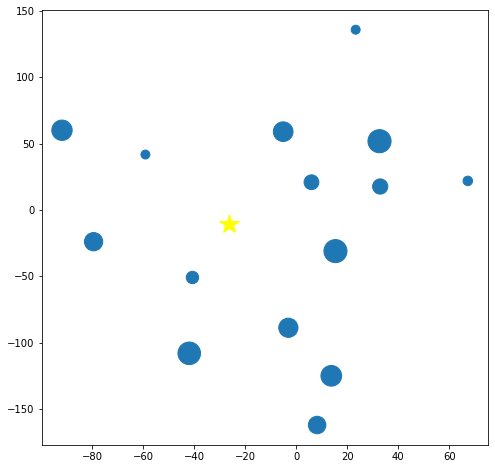

In [131]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(x=buan_pd['Longitude'], y=buan_pd['Latitude'], s = buan_pd['population']//100 )
#for i in range(len(buan_pd)):
#    ax.annotate(buan_pd.iloc[i]['name'], buan_pd.iloc[i][['Latitude', 'Longitude']].values + 5, fontsize= 16)

#plt.axis('square')
#plt.axis([-200, 200, -150, 150])
plt.plot(x, y, '*' , markersize=20, color = 'yellow')

# Optimized Distance

In [139]:
d = np.sqrt((buan_pd['Latitude'] - x)**2 +(buan_pd['Longitude'] - x)**2)
D = (d * buan_pd['population']).sum()
print(D)

39044068.95897755


In [142]:
D / buan_pd['population'].sum()

83.56767004265178

In [145]:
avg_dist = [{'name': 'COG', 'avg': D /buan_pd['population'].sum()}]

In [150]:
for i, row in buan_pd.iterrows():
    x = row['Latitude']
    y = row['Longitude']
    d = np.sqrt((buan_pd['Latitude'] - x)**2 +(buan_pd['Longitude'] - x)**2)
    D = (d * buan_pd['population']).sum()
    avg_dist.append({'name': row['name'], 'avg': D / buan_pd['population'].sum()})

In [152]:
pd.DataFrame(avg_dist).sort_values(by='avg')

,name,avg
25,J,83.164405
10,J,83.164405
26,K,84.564380
11,K,84.564380
24,I,89.090366
9,I,89.090366
3,C,90.742880
18,C,90.742880
29,N,91.311120
14,N,91.311120


Based on the code above, we can see that the COG is calculated at: 
    
    COG X coordinate: -26.301327142879813
    COG Y coordinate: -10.564798745078917
    
However, the best average distance assuming that the cities can stand as candidates for a warehouse lands at City "J". Which provides a customer an average distance of 83.164405. 